## Ten Jupyter/IPython essentials

From: Learning IPython for Interactive Computing and Data Visualization - Second Edition (PacktPub)

### Using IPython as an extended shell

In [1]:
%pwd

u'/Users/alexlee/Dropbox/redso/jupyter_demo'

Let's illustrate how to use IPython as an extended shell. We will download an example dataset, navigate through the filesystem, and open text files, all from the Notebook. The dataset contains social network data of hundreds of volunteer Facebook users. This BSD-licensed dataset is provided freely by Stanford's SNAP project (http://snap.stanford.edu/data/).



In [3]:
!wget https://raw.githubusercontent.com/ipython-books/minibook-2nd-data/master/facebook.zip

--2016-01-28 14:44:25--  https://raw.githubusercontent.com/ipython-books/minibook-2nd-data/master/facebook.zip
Resolving raw.githubusercontent.com... 103.245.222.133
Connecting to raw.githubusercontent.com|103.245.222.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 610785 (596K) [application/zip]
Saving to: 'facebook.zip'

facebook.zip        100%[===================>] 596.47K   652KB/s    in 0.9s    

2016-01-28 14:44:28 (652 KB/s) - 'facebook.zip' saved [610785/610785]



In [5]:
!whoami

alexlee


In [6]:
%ls

facebook.zip                       ten_essential_jupyter.ipynb
not_so_obvious_python_stuff.ipynb


In [7]:
!unzip facebook.zip

Archive:  facebook.zip
  inflating: facebook/0.circles      
  inflating: facebook/0.edges        
  inflating: facebook/107.circles    
  inflating: facebook/107.edges      
  inflating: facebook/1684.circles   
  inflating: facebook/1684.edges     
  inflating: facebook/1912.circles   
  inflating: facebook/1912.edges     
  inflating: facebook/3437.circles   
  inflating: facebook/3437.edges     
  inflating: facebook/348.circles    
  inflating: facebook/348.edges      
  inflating: facebook/3980.circles   
  inflating: facebook/3980.edges     
  inflating: facebook/414.circles    
  inflating: facebook/414.edges      
  inflating: facebook/686.circles    
  inflating: facebook/686.edges      
  inflating: facebook/698.circles    
  inflating: facebook/698.edges      


In [8]:
%ls

facebook/                          not_so_obvious_python_stuff.ipynb
facebook.zip                       ten_essential_jupyter.ipynb


In [9]:
%cd facebook

/Users/alexlee/Dropbox/redso/jupyter_demo/facebook


IPython provides a %bookmark magic to create an alias to the current directory. Let's type the following:

In [10]:
%bookmark fbdata

Now, in any future session, we'll be able to just type %cd fbdata to enter into this directory.

In [11]:
%ls

0.circles     1684.circles  3437.circles  3980.circles  686.circles
0.edges       1684.edges    3437.edges    3980.edges    686.edges
107.circles   1912.circles  348.circles   414.circles   698.circles
107.edges     1912.edges    348.edges     414.edges     698.edges


Here, every number identifies a Facebook user (called the ego user). The .edges file contains its social graph. In this graph, nodes represent other Facebook users, and edges represent friendship links between them. The .circles file contains lists of friends.

In [12]:
files = !ls -1 -S | grep .edges

In [13]:
files

['1912.edges',
 '107.edges',
 '1684.edges',
 '3437.edges',
 '348.edges',
 '0.edges',
 '414.edges',
 '686.edges',
 '698.edges',
 '3980.edges']

In [14]:
import os
from operator import itemgetter
# Get the name and file size of all .edges files.
files = [(file, os.stat(file).st_size)
         for file in os.listdir('.')
         if file.endswith('.edges')]
# Sort the list with the second item (file size),
# in decreasing order.
files = sorted(files,
               key=itemgetter(1),
               reverse=True)
# Only keep the first item (file name), in the same order.
files = [file for (file, size) in files]

The curly braces {} let us insert a Python variable within a system command (here, the head Unix command which displays the first lines of a text file).

In [15]:
!head -n5 {files[0]}

2290 2363
2346 2025
2140 2428
2201 2506
2425 2557


In an .edges file, every line contains the two nodes forming every edge. The .circles file contains lists of friends. Every line contains a space-separated list of the users forming every circle.

### Learning magic commands

We will now see several cell magics, which are magic commands that apply to a whole code cell rather than just a line of code. They are prefixed by two percent signs (%%).

In [16]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autocall  %automagic  %autosave  %bookmark  %cat  %cd  %clear  %colors  %config  %connect_info  %cp  %debug  %dhist  %dirs  %doctest_mode  %ed  %edit  %env  %gui  %hist  %history  %install_default_config  %install_ext  %install_profiles  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %man  %matplotlib  %mkdir  %more  %mv  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %popd  %pprint  %precision  %profile  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%debug  %%file  %%html  %%javascript  %%latex  %%

In [17]:
%history?

In [20]:
!history?

In [ ]:
!history

In [18]:
%history -l 5

files
import os
from operator import itemgetter
# Get the name and file size of all .edges files.
files = [(file, os.stat(file).st_size)
         for file in os.listdir('.')
         if file.endswith('.edges')]
# Sort the list with the second item (file size),
# in decreasing order.
files = sorted(files,
               key=itemgetter(1),
               reverse=True)
# Only keep the first item (file name), in the same order.
files = [file for (file, size) in files]
!head -n5 {files[0]}
%lsmagic
%history?


In [21]:
# how many minutes in a day?
24 * 60

1440

In IPython, the **underscore (_)** character always contains the last output. 

In [22]:
# and in a year?
_ * 365

525600

We will now see several **cell magics**, which are magic commands that apply to a whole code cell rather than just a line of code. They are prefixed by two percent signs (%%).

In [23]:
%%capture output
%ls

In [24]:
output.stdout

u'0.circles     1684.circles  3437.circles  3980.circles  686.circles\r\n0.edges       1684.edges    3437.edges    3980.edges    686.edges\r\n107.circles   1912.circles  348.circles   414.circles   698.circles\r\n107.edges     1912.edges    348.edges     414.edges     698.edges\r\n'

The %%bash cell magic is an extension of the ! shell prefix. It lets you run multiline bash code in the Notebook, as shown here:

In [25]:
%%bash
cd ..
touch _HEY
ls
rm _HEY
cd facebook

_HEY
facebook
facebook.zip
not_so_obvious_python_stuff.ipynb
ten_essential_jupyter.ipynb


More generally, the %%script cell magic lets you execute code with any program installed on your system. For example, assuming Haskell is installed (see https://www.haskell.org/downloads), you can easily execute Haskell code from the Notebook, as follows:

In [26]:
%%script /Users/alexlee/.nvm/versions/node/v4.2.4/bin/node
console.log("Hello world!");
console.log(3 + 3);
console.log(a = 3);
console.log(b = 9);
console.log(a === b ? "This is true" : "This is false");

Hello world!
6
3
9
This is false


In [27]:
%%javascript
require.config({
  paths: {
      d3: '//cdnjs.cloudflare.com/ajax/libs/d3/3.4.8/d3.min'
  }
});

<IPython.core.display.Javascript object>

IPython’s %%javascript magic runs code client-side and sets a global JQuery-selected variable, element, to refer to the output cell. This is obviously very convenient – we now have a way to create arbitrary DOM elements in our cell. In particular, we can create SVG canvases and add SVG shapes to that canvas… see where this is going?

In [28]:
%%javascript
element.append("<div id='chart1'>Here Comes The Magic!</div>");

<IPython.core.display.Javascript object>

In [29]:
%%javascript
Jupyter.utils.load_extensions('vim_binding/vim_binding')

<IPython.core.display.Javascript object>

In [ ]:
from IPython.core.display import HTML

Finally, the %%writefile cell magic lets you write some text in a new file, as shown here:


In [30]:
%%writefile myfile.txt
Hello world!

Writing myfile.txt


In [31]:
!more myfile.txt

=Hello world!
>

In [32]:
!rm myfile.txt

### Mastering tab completion

Tab completion is an incredibly useful feature in Jupyter and IPython. When you start to write something and press the Tab key on your keyboard, IPython can guess what you're trying to do, and propose a list of options that match what you have typed so far. This works for Python functions, variables, magic commands, files, and more.

In [33]:
%cd fbdata
%ls

(bookmark:fbdata) -> /Users/alexlee/Dropbox/redso/jupyter_demo/facebook
/Users/alexlee/Dropbox/redso/jupyter_demo/facebook
0.circles     1684.circles  3437.circles  3980.circles  686.circles
0.edges       1684.edges    3437.edges    3980.edges    686.edges
107.circles   1912.circles  348.circles   414.circles   698.circles
107.edges     1912.edges    348.edges     414.edges     698.edges


Now, start typing a command and press Tab before finishing it (here, press the Tab key on your keyboard right after typing e), as follows:


In [34]:
!head -n5 107.edges

953 1323
1789 1707
1175 1059
1329 1559
1804 1898


### Writing interactive documents in the Notebook with Markdown

### New paragraph

This is *rich* **text** with [links](http://ipython.org), equations:

$$\hat{f}(\xi) = \int_{-\infty}^{+\infty} f(x)\, \mathrm{e}^{-i \xi x} dx$$

code with syntax highlighting:

    ```python
    print("Hello world!")
    ```

and images:

![This is an image](http://ipython.org/_static/IPy_header.png)

### Creating interactive widgets in the Notebook

You can add interactive graphical elements called widgets in a notebook. Examples of rich graphical widgets include buttons, sliders, dropdown menus, interactive plots, as well as videos, audio files, and complete Graphical User Interfaces (GUIs). Widget support in Jupyter is still relatively experimental at this point, but we will use them at several occasions in this book. This section shows a few basic examples.

First, let's add a YouTube video in a notebook, as follows:

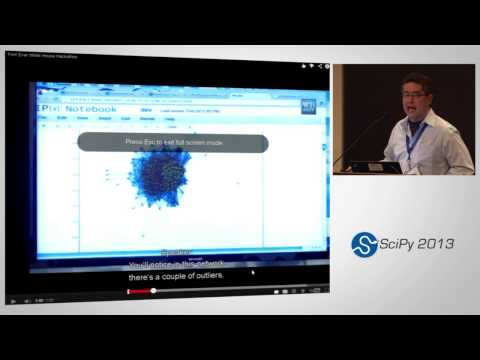

In [35]:
from IPython.display import YouTubeVideo
YouTubeVideo('j9YpkSX7NNM')

Next, let's show how to create a graphical control to manipulate the inputs to a Python function:


### Running Python scripts from IPython

In [36]:
%cd fbdata
%cd ..

(bookmark:fbdata) -> /Users/alexlee/Dropbox/redso/jupyter_demo/facebook
/Users/alexlee/Dropbox/redso/jupyter_demo/facebook
/Users/alexlee/Dropbox/redso/jupyter_demo


In [37]:
%%writefile egos.py
import sys
import os
# We retrieve the folder as the first positional argument
# to the command-line call
if len(sys.argv) > 1:
    folder = sys.argv[1]
# We list all files in the specified folder
files = os.listdir(folder)
# ids contains the list of idenfitiers
identifiers = [int(file.split('.')[0]) for file in files]
# Finally, we remove duplicates with set(), and sort the list
# with sorted().
ids = sorted(set(identifiers))

Writing egos.py


In [ ]:
%run egos.py facebook

In [ ]:
ids

In [ ]:
folder = 'facebook'

In [ ]:
%run egos.py

We get an error: NameError: name 'folder' is not defined. This is because the variable folder is defined in the interactive namespace, but is not available within the script by default. We can change this behavior with the -i option, as follows:



In [ ]:
%run -i egos.py

This time, the script correctly used the folder variable.

In [ ]:
ids

### Introspecting Python objects

In [41]:
!pip install networkx

Downloading/unpacking networkx
  Using download cache from /Users/alexlee/.pip/cache/https%3A%2F%2Fpypi.python.org%2Fpackages%2Fsource%2Fn%2Fnetworkx%2Fnetworkx-1.10.tar.gz
  Running setup.py (path:/Users/alexlee/Virtualenvs/demo/build/networkx/setup.py) egg_info for package networkx
    
    no previously-included directories found matching 'doc/build'
    no previously-included directories found matching 'doc/source/reference/generated'
    no previously-included directories found matching 'doc/source/examples'
    no previously-included directories found matching 'doc/source/static/examples'
    no previously-included directories found matching 'doc/source/templates/gallery.html'
  Running setup.py install for networkx
    
    no previously-included directories found matching 'doc/build'
    no previously-included directories found matching 'doc/source/reference/generated'
    no previously-included directories found matching 'doc/source/examples'
    no previously-included directo

In [42]:
import networkx

In [ ]:
networkx.Graph?

Typing ?? instead of ? shows even more information, including the whole source code of the Python object when it is available.

In [ ]:
networkx.Graph??

There are also several magic commands for inspecting Python objects:

* %pdef: Displays a function definition
* %pdoc: Displays the docstring of a Python object
* %psource: Displays the source code of an object (function, class, or method)
* %pfile: Displays the source code of the Python script where an object is defined

In [ ]:
%pdoc networkx.Graph

### Debugging Python code

IPython makes it convenient to debug a script or an entire application. It provides interactive access to an enhanced version of the Python debugger.

First, when you encounter an exception, you can immediately use the %debug magic command to launch the IPython debugger at the exact point where the exception was raised.

If you activate the %pdb magic command, the debugger will automatically start at the very next exception. You can also start IPython with ipython --pdb.

Finally, you can run a whole script under the control of the debugger with the %run -d command. This command executes the specified script with a break point at the first line so that you can precisely control the execution flow of the script. You can also specify explicitly where to put the first breakpoint; type %run -d -b29 script.py to pause the program execution on line 29 of script.py. In all cases, you first need to type c to start the script execution.

When the debugger starts, you enter into a special prompt, as indicated by ipdb>. The program execution is then paused at a given point in the code. You can type w to display the line and stack location where the debugger has paused. At this point, you have access to all local variables and you can precisely control how you want to resume the execution. Within the debugger, several commands are available to navigate into the traceback; they are as follows:

* u/d for going up/down into the call stack
* s to step into the next statement
* n to continue execution until the next line in the current function
* r to continue execution until the current function returns
* c to continue execution until the next breakpoint or exception

Other useful commands include:

* p to evaluate and print any expression
* a to obtain the arguments of the current functions
* The ! prefix to execute any Python command within the debugger

The entire list of commands can be found in the documentation of the pdb module in Python at https://docs.python.org/3.4/library/pdb.html.

Let's also mention the IPython.embed() function that you can call anywhere in a Python script. This stops the script execution and starts IPython for debugging purposes. Leaving the embedded IPython terminal resumes the normal execution of the script.



### Benchmarking Python code

The %timeit magic function lets us estimate the execution time of any Python statement. Under the hood, it uses Python's native timeit module.

In [43]:
%cd fbdata

(bookmark:fbdata) -> /Users/alexlee/Dropbox/redso/jupyter_demo/facebook
/Users/alexlee/Dropbox/redso/jupyter_demo/facebook


In [44]:
import networkx

We can load a graph using the read_edgelist() function, as follows:

In [45]:
graph = networkx.read_edgelist('107.edges')

How big is our graph?

In [46]:
len(graph.nodes()), len(graph.edges())

(1034, 26749)

How big is our graph?

In [47]:
networkx.is_connected(graph)

True

How long did this call take?

In [48]:
%timeit networkx.is_connected(graph)

100 loops, best of 3: 10.3 ms per loop


Multiple calls are done in order to get more reliable time estimates. The number of calls is determined automatically, but you can use the -r and -n options to specify them directly. Type %timeit? to get more information.

### Profiling Python code

The %timeit magic command gives you precious information about the total time taken by a function or a statement. This can help you find the fastest among several implementations of an algorithm, for example.

When you're finding that some code is too slow, you need to profile it before you can make it faster. Profiling gives you more than the total time taken by a function; it tells you exactly what is taking too long in your code.

The %prun magic command lets you easily profile your code. It provides a convenient interface to Python's native profile module.

Let's see a simple example. We first create a function returning the number of connected components in a file, as follows:

In [ ]:
import networkx

In [ ]:
def ncomponents(file):
    graph = networkx.read_edgelist(file)
    return networkx.number_connected_components(graph)

Now we write a function that returns the number of connected components in all graphs defined in the directory, as follows:



In [ ]:
import glob
def ncomponents_files():
    return [(file, ncomponents(file))
            for file in sorted(glob.glob('*.edges'))]

The glob module (https://docs.python.org/3.4/library/glob.html) lets us find all files matching a given pattern (here, all files with the .edges file extension).

In [ ]:
for file, n in ncomponents_files():
    print(file.ljust(12), n, 'component(s)')

Let's first evaluate the time taken by this function:


In [ ]:
%timeit ncomponents_files()

Now, to run the profiler, we use the %prun magic function, as follows:



In [ ]:
%prun -s cumtime ncomponents_files()

Let's explain what happened here. The profiler kept track of all function calls (including functions internal to NetworkX and Python) performed while our ncomponents_files() function was running. There were 2,391,070 function calls. That's a lot! Opening a file, reading and parsing every line, creating the graphs, finding the number of connected components, and so on, are operations that involve many function calls.

The profiler shows the list of all function calls (we just showed a subset here). There are many ways to sort the functions. Here, we chose to sort them by cumulative time, which is the total time spent within every function (-s cumtime option).

For every function, the profiler shows the total number of calls, and several time statistics, described here (copied verbatim from the profiler documentation):

* tottime: the total time spent in the given function (and excluding time made in calls to sub-functions)
* percall: the quotient of tottime divided by ncalls
* cumtime: the cumulative time spent in this and all subfunctions
* percall: the quotient of cumtime divided by the number of non-recursive function calls
You will find more information by typing %prun? or by looking here: https://docs.python.org/3.4/library/profile.html

Here, we see that computing the number of connected components took considerably less time than loading the graphs from the text files. Depending on the use-case, this might suggest using a more efficient file format.

There is of course much more to say about profiling and optimization. For example, it is possible to profile a function line by line, which provides an even more fine-grained profiling report. The IPython Cookbook contains many more details.